In [2]:
import pandas as pd

iris = pd.read_csv("iris_data.txt", sep = '\t') #si no funciona podemos cambiar .txt por .csv
# iris.info() #hago info y veo que está limpio, no hay NaN
iris.describe() #no son paramétricos porque la mediana no es igual a la media


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# !pip3 install sklearn

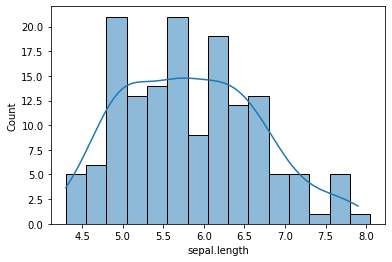

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.histplot(data = iris, x = "sepal.length", binwidth=0.25, kde = True)
plt.show() #no tiene una distribución normal

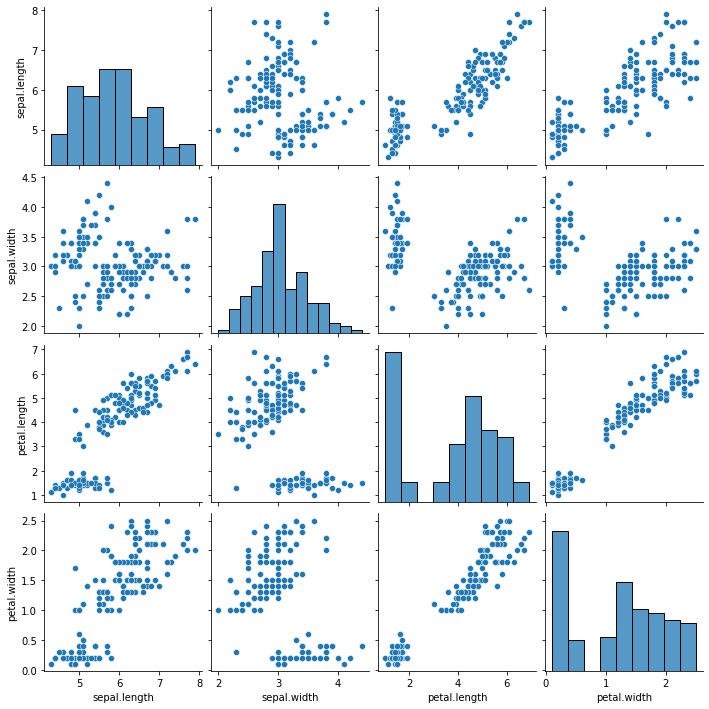

In [5]:
""" Correlatograma """
g = sns.pairplot(iris) #Graficar todas las variables con todas las variables 
# hay correlacion en: petal.length y petal.width, 
# Me doy cuenta si hay correlación si datos no están todos juntos hay dos grupos de datos, cuando hay un espacio entre los puntos es que hay más de una población 

In [6]:
"""  Escalado Estandar:
Transformar o convertir el conjunto de datos en una distribución normal, de forma que todos datos tenga una varianza del mismo orden. 
De este modo, cada dato nos dará una idea de a cuántos desvíos de la media está ese punto."""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)
iris_escaleado

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [7]:
""" K-means
Agrupa las observaciones en los mejores K grupos distintos, es decirlos k clusters con la menor varianza interna (intra-cluster variation)
posible. Es decir que se reparten las observaciones en K clusters de forma que la suma de las varianzas internas de todos ellos sea lo 
menor posible. 
"""
# sirve para agrupar datos

from sklearn.cluster import KMeans, DBSCAN

k = 3  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=3, random_state=123457)

In [8]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
print(kmeans.cluster_centers_ )

[[-0.06881714 -0.89036741  0.34501443  0.28492552]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13140499  0.08716178  0.98548265  0.99875633]]


In [10]:
""" Para entender mejor los resultados obtenidos grafiquemos la distribución de puntos, 
pintando cada punto según el color correspondiente al etiquetado:"""

import seaborn as sns
# colores = ["red", "green"]
# g = sns.scatterplot(x = iris_escaleado[:,1], y = iris_escaleado[:, 2], hue = kmeans.labels_, palette = colores, alpha = 0.5)
# g = sns.scatterplot(x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,2], zorder = 10, palette = colores, hue = [0, 1], legend = False, marker=6, s=200)

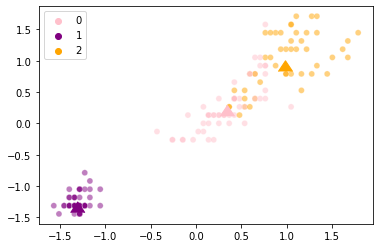

In [11]:
colores = ["pink", "purple", "orange"]
# g=sns.set(rc={'figsize':(11.7,8.27)})
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5) #pone los puntos en el grafico
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200) #grafica los centroides

In [12]:
from scipy import stats

In [13]:
#test de normalidad
w, p = stats.shapiro(iris["sepal.width"]) #w=estadistico, p=p value
#p>0,05 -->normal

In [14]:
p
#es normal con un 95% de confianza

0.0751834362745285

In [15]:
w
#no usamos esto, se agrega para guardar un valor

0.9837918877601624

In [16]:
iris_escaleado[:,2] #la lista entera iris_escaleado de principio a fin (:) pero solo tomando los valores en la posicion 2 (tercer columna)

array([-1.3412724 , -1.3412724 , -1.39813811, -1.2844067 , -1.3412724 ,
       -1.17067529, -1.3412724 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.2844067 , -1.227541  , -1.3412724 , -1.51186952, -1.45500381,
       -1.2844067 , -1.39813811, -1.3412724 , -1.17067529, -1.2844067 ,
       -1.17067529, -1.2844067 , -1.56873522, -1.17067529, -1.05694388,
       -1.227541  , -1.227541  , -1.2844067 , -1.3412724 , -1.227541  ,
       -1.227541  , -1.2844067 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.45500381, -1.39813811, -1.2844067 , -1.39813811, -1.2844067 ,
       -1.39813811, -1.39813811, -1.39813811, -1.227541  , -1.05694388,
       -1.3412724 , -1.227541  , -1.3412724 , -1.2844067 , -1.3412724 ,
        0.53529583,  0.42156442,  0.64902723,  0.1372359 ,  0.47843012,
        0.42156442,  0.53529583, -0.26082403,  0.47843012,  0.08037019,
       -0.14709262,  0.25096731,  0.1372359 ,  0.53529583, -0.09022692,
        0.36469871,  0.42156442,  0.1941016 ,  0.42156442,  0.08

In [17]:
print(kmeans.inertia_)

140.96837895511075


In [18]:
inercias={}
def inercias_por_k(diccionario):
    for i in range(1,11):
        kmeans =KMeans (n_clusters=i,init="random", n_init=10, max_iter=300, random_state=1234567)
        kmeans.fit(iris_escaleado)
        diccionario[i]=kmeans.inertia_

In [19]:
inercias_por_k(inercias)

In [20]:
inercias #es mejor buscar inercias bajas

{1: 600.0,
 2: 223.73200573676345,
 3: 140.96581663074699,
 4: 114.42714544645857,
 5: 91.58093177956651,
 6: 81.75658187204955,
 7: 70.88546993521874,
 8: 62.801554625333594,
 9: 54.637643179559234,
 10: 47.7106562641797}

In [21]:
df_inercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])

In [28]:
df_inercias

,K,inercia
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.427145
4,5,91.580932
5,6,81.756582
6,7,70.885470
7,8,62.801555
8,9,54.637643
9,10,47.710656


<AxesSubplot:xlabel='K', ylabel='inercia'>

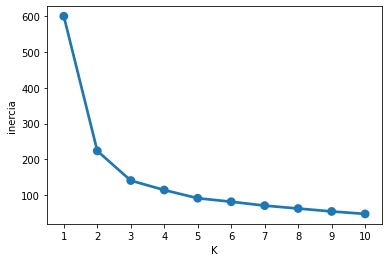

In [22]:
sns.pointplot(data=df_inercias, x="K", y="inercia")


In [29]:
""" como sé cuántos grupos tengo que hacer? --> hacer primero el gráfico de la regla del codo. Cada grupo diferente es donde cambia la pendiente """

' como sé cuántos grupos tengo que hacer? --> hacer primero el gráfico de la regla del codo. Cada grupo diferente es donde cambia la pendiente '

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
def graficarSilhouette(k, labels, sample_silhouette_values, silhouette_avg):
    fig, ax1 = plt.subplots(1, 1)
    y_lower = 10
    for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

    ax1.set_title("Plot del silhouette de cada cluster")
    ax1.set_xlabel("Coeficiente de silhouette")
    ax1.set_ylabel("Etiqueta del cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) 

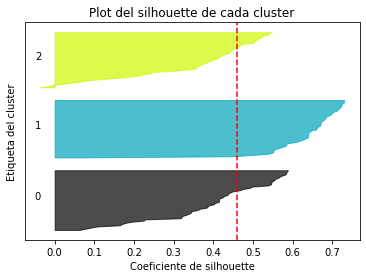

In [26]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)
#los datos menores a cero no son confiables -->pertenecen a otro grupo
#si se aproximan a 1, si son confiables

In [27]:
#si hay muchos datos que son menores a 0, debo cambiar la cantidad de grupos. Si son pocos, simplemente los desestimo